In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style = 'whitegrid')
df = pd.read_csv('/content/Heart Disease.csv')
print(f"Some rows:\n{df.head(10)}")

Some rows:
   gender  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0    Male   39        4.0              0         0.0     0.0                0   
1  Female   46        2.0              0         0.0     0.0                0   
2    Male   48        1.0              1        20.0     0.0                0   
3  Female   61        3.0              1        30.0     0.0                0   
4  Female   46        3.0              1        23.0     0.0                0   
5  Female   43        2.0              0         0.0     0.0                0   
6  Female   63        1.0              0         0.0     0.0                0   
7  Female   45        2.0              1        20.0     0.0                0   
8    Male   52        1.0              0         0.0     0.0                0   
9    Male   43        1.0              1        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0   

In [ ]:
df.shape

(4240, 16)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
gender                                0
age                                   0
education                           105
currentSmoker                         0
cigsPerDay                           29
BPMeds                               53
prevalentStroke                       0
prevalentHyp                          0
diabetes                              0
totChol                              50
sysBP                                 0
diaBP                                 0
BMI                                  19
heartRate                             1
glucose                             388
Heart Disease (in next 10 years)      0
dtype: int64


In [ ]:
num_columns = df.select_dtypes(include = ['float64', 'int64']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].median())

In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df.rename(columns = {'Heart Disease (in next 10 years)' : 'target'}, inplace = True)

In [ ]:
print(f"Dataset after cleaning:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  target           4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
Dataset after

In [ ]:
x = df.drop('target', axis = 1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, classification_report, confusion_matrix, roc_curve, auc

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test_scaled)

In [ ]:
print(f"Confusion matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"\nClassification report:\n {classification_report(y_test, y_pred)}")

Confusion matrix:
 [[720   5]
 [118   5]]

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.04      0.08       123

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848



In [ ]:
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred)
f1__score = f1_score(y_test, y_pred)

print(f"Accuracy: {acc_score:.2f}\nPrecision: {prec_score:.2f}\nRecall: {rec_score:.2f}\nF1-Score: {f1__score:.2f}")

Accuracy: 0.85
Precision: 0.50
Recall: 0.04
F1-Score: 0.08


In [ ]:
y_pred_rf= model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

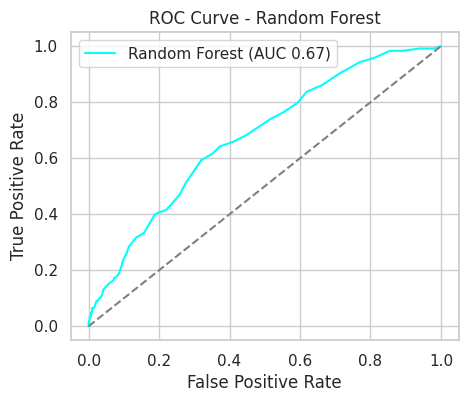

In [ ]:
plt.figure(figsize = (5, 4))
plt.plot(fpr, tpr, label = f"Random Forest (AUC {roc_auc:.2f})", color = 'cyan')
plt.plot([0, 1], [0, 1], color = "grey", linestyle = '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc = "upper left")
plt.grid(True)
plt.show()